# MDP class

`````{margin}
````{dropdown} Necessary imports
```{code-block} python
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from myst_nb import glue
from scipy.stats import beta

from colosseum.mdp.custom_mdp import CustomEpisodic
from colosseum.mdp.river_swim import RiverSwimEpisodic
from colosseum.mdp.simple_grid import SimpleGridContinuous

np.random.seed(42)
```
````
`````

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from myst_nb import glue
from scipy.stats import beta

from colosseum.mdp.custom_mdp import CustomEpisodic
from colosseum.mdp.river_swim import RiverSwimEpisodic
from colosseum.mdp.simple_grid import SimpleGridContinuous

np.random.seed(42)

The [``BaseMDP``](../pdoc_files/colosseum/mdp/base.html#BaseMDP) class efficiently computes important properties of the MDP.
This tutorial introduces some of them.
For the sake of the tutorial, we focus on the continuous setting.
Note however that a continuous MDP form such that the state space includes the in-episode time is available for every episodic MDP, meaning that {{col}} enables transforming episodic MDPs into continuous ones.
Have a look a the [`EpisodicMDP`](../pdoc_files/colosseum/mdp/base_finite.html#EpisodicMDP) class for further details on the properties and function specific to the episodic setting.

## Custom MDP
Before diving into the tutorial, we briefly introduce the [`CustomMDP`](../pdoc_files/colosseum/mdp/custom_mdp.html#CustomMDP) class, which can be used to instantiate an MDP from a transition kernel, a matrix of deterministic rewards (or a dictionary of random variables for stochastic rewards), and a starting state distribution.
Note that all the properties available for the `BaseMDP` class are also available for ``CustomMDP``.

In [2]:
n_states = 4
n_actions = 2

### Transition kernel
T = [
  [
      [0.0, 1.0, 0.0, 0.0], # next state distribtion for selecting action 0 in state 0, i.e. T(0, 0)
      [0.0, 0.0, 1.0, 0.0], # next state distribtion for selecting action 1 in state 0, i.e. T(0, 1)
  ],
  [
      [0.0, 0.0, 0.5, 0.5], # next state distribution for selecting action 0 in state 1, i.e. T(1, 0)
      [0.0, 0.8, 0.1, 0.1], # next state distribution for selecting action 1 in state 1, i.e. T(1, 1)
  ],
  [
      [0.0, 0.5, 0.0, 0.5], # next state distribution for selecting action 0 in state 2, i.e. T(2, 0)
      [0.0, 0.1, 0.8, 0.1], # next state distribution for selecting action 1 in state 2, i.e. T(2, 1)
  ],
  [
      [0.5, 0.25, 0.25, 0.0], # next state distribution for selecting action 0 in state 3, i.e. T(3, 0)
      [0.1, 0.10, 0.10, 0.7], # next state distribution for selecting action 1 in state 3, i.e. T(3, 1)
  ],
]

### Reward distributions

# defined as a dictionary of scipy distributions
R = {
  (s, a): beta(np.random.uniform(0, 30), np.random.uniform(0, 30))
  for s in range(n_states)
  for a in range(n_actions)
}
# or as a matrix deterministic rewards
# R = np.random.randn(n_states, n_actions)

# Starting state distribution that assigns equal probability to state 0 and state 1
T_0 = {0: 0.5, 1 : 0.5}

# Instantiate the CustomEpisodic object
mdp_custom = CustomEpisodic(seed=42, T_0=T_0, T=np.array(T).astype(np.float32), R=R)

# Compute some properties available for the BaseMDP class
print(mdp_custom.measures_of_hardness)
print(mdp_custom.communication_class)

{'diameter': 4.399501323699951, 'suboptimal_gaps': 111.37712, 'value_norm': 0.20420666}


MDPCommunicationClass.ERGODIC


## The ``BaseMDP`` class

A SimpleGrid MDP is taken as a running example for the tutorial.

In [3]:
mdp = SimpleGridContinuous(seed=0, size=4, p_rand=0.01, n_starting_states=3)

In addition to the optimal policy, the random uniform policy, and the worst policy, which are pre-computed by the package, we also explain how to compute the MDP properties for a custom policy.
For the sake of the tutorials, we sample the custom policy from a Dirichlet distribution.
Note that a continuous policy is an array of dimensionality number of states by number of actions such that each row defines a probability distribution over actions, whereas an episodic policy is an array of dimensionality episode length by number of states by number of action such that each in-episode time and state are associated with a probability distribution over actions.

In [4]:
pi = mdp._rng.dirichlet([1.0] * mdp.n_actions, mdp.n_states)
print("Continuous policy shape: ", pi.shape)
print(pi.round(2))

Continuous policy shape:  (16, 5)
[[0.5  0.   0.11 0.34 0.05]
 [0.28 0.02 0.09 0.01 0.6 ]
 [0.06 0.09 0.58 0.27 0.01]
 [0.04 0.19 0.17 0.05 0.54]
 [0.22 0.18 0.21 0.31 0.09]
 [0.1  0.05 0.04 0.56 0.26]
 [0.36 0.14 0.16 0.03 0.31]
 [0.17 0.53 0.21 0.09 0.01]
 [0.01 0.23 0.12 0.16 0.47]
 [0.74 0.04 0.17 0.05 0.  ]
 [0.29 0.08 0.1  0.18 0.36]
 [0.19 0.4  0.06 0.31 0.04]
 [0.35 0.13 0.03 0.34 0.15]
 [0.19 0.16 0.48 0.02 0.15]
 [0.19 0.16 0.22 0.11 0.31]
 [0.47 0.03 0.17 0.03 0.3 ]]


## MDP structure quantities

**MDP communication class**  
The [`communication_class`](../pdoc_files/colosseum/mdp/base.html#BaseMDP.communication_class) property returns an [``MDPCommunicationClass`](../pdoc_files/colosseum/mdp/utils/communication_class.html#MDPCommunicationClass) object, which is a Python enumeration for the possible MDP communication classes.

In [5]:
mdp.communication_class.name

'ERGODIC'

**Starting states distribution**  
The [`starting_state_distribution`](../pdoc_files/colosseum/mdp/base.html#BaseMDP.starting_state_distribution) property returns a Numpy array containing the probability of the states being sampled as starting states.
You can retrieve the associated state uniquely identifying information using the
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.get_node_labels">``get_node_labels``</a>
function.

In [6]:
ssd = mdp.starting_state_distribution.round(2)
print("Starting state distribution", ssd)
print("Starting state distribution with associated nodes" , mdp.get_node_labels(ssd))

Starting state distribution [0.33 0.33 0.   0.   0.   0.   0.   0.33 0.   0.   0.   0.   0.   0.
 0.   0.  ]
Starting state distribution with associated nodes {SimpleGridNode(X=2, Y=1): 0.33, SimpleGridNode(X=2, Y=2): 0.33, SimpleGridNode(X=3, Y=1): 0.0, SimpleGridNode(X=2, Y=0): 0.0, SimpleGridNode(X=1, Y=1): 0.0, SimpleGridNode(X=2, Y=3): 0.0, SimpleGridNode(X=3, Y=2): 0.0, SimpleGridNode(X=1, Y=2): 0.33, SimpleGridNode(X=3, Y=3): 0.0, SimpleGridNode(X=1, Y=3): 0.0, SimpleGridNode(X=3, Y=0): 0.0, SimpleGridNode(X=1, Y=0): 0.0, SimpleGridNode(X=0, Y=0): 0.0, SimpleGridNode(X=0, Y=1): 0.0, SimpleGridNode(X=0, Y=2): 0.0, SimpleGridNode(X=0, Y=3): 0.0}


**Expected rewards matrix**  
The
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.R">``R``</a>
property returns a number of states by number of actions Numpy array such that to each state $s$ and action $a$ is associated with the expected reward following selecting $a$ from $s$.
We can visualise the matrix as a Pandas DataFrame.

In [7]:
pd.DataFrame(
    mdp.R.round(2),
    pd.Index(mdp.G.nodes, name="State"),
    pd.Index(map(lambda x: x.name, mdp.get_action_class()), name="Action"),
).style.set_table_attributes('style="font-size: 10px"')

Action,UP,RIGHT,DOWN,LEFT,NO_OP
State,,,,,
"X=2,Y=1",0.500000,0.500000,0.500000,0.500000,0.500000
"X=2,Y=2",0.500000,0.500000,0.500000,0.500000,0.500000
"X=3,Y=1",0.500000,0.500000,0.500000,0.500000,0.500000
"X=2,Y=0",0.500000,0.500000,0.500000,0.500000,0.500000
"X=1,Y=1",0.500000,0.500000,0.500000,0.500000,0.500000
"X=2,Y=3",0.500000,0.500000,0.500000,0.500000,0.500000
"X=3,Y=2",0.500000,0.500000,0.500000,0.500000,0.500000
"X=1,Y=2",0.500000,0.500000,0.500000,0.500000,0.500000
"X=3,Y=3",0.000000,0.500000,0.000000,0.500000,0.000000


**Transition kernel**  
The
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.T">``T``</a>
property returns a number of states by number of actions by number of states Numpy array such that to each state $s$ and action $a$ is associated the probability distribution of the next state when selecting $a$ from $s$.
We can visualise the kernel using a Pandas DataFrame.

In [8]:
df = pd.MultiIndex.from_product(
    [
        mdp.G.nodes,
        map(lambda x: x.name, mdp.get_action_class()),
        mdp.G.nodes,
    ],
    names=["State from", "Action", "State to"],
)
df = pd.DataFrame(mdp.T.round(2).flatten(), index=df)
df = df.unstack(level="State to")
df.style.format(precision=2).set_table_attributes('style="font-size: 10px"')

## Performance related quantities

**Stationary distribution**  
The
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.optimal_stationary_distribution">``optimal_stationary_distribution``</a>
, the
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.worst_stationary_distribution">``worst_stationary_distribution``</a>
, and the
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.random_stationary_distribution">``random_stationary_distribution``</a>
properties return Numpy arrays containing the stationary distributions of the Markov chain yielded by the optimal, worst, and uniformly random policies.
We can compute the stationary distribution associated with a custom policy using the
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.get_stationary_distribution">``get_stationary_distribution``</a>
function.

In [9]:
osd = mdp.optimal_stationary_distribution.round(2)
osd_node_labels = mdp.get_node_labels(osd)

wsd = mdp.worst_stationary_distribution.round(2)
wsd_node_labels = mdp.get_node_labels(wsd)

rsd = mdp.random_stationary_distribution.round(2)
rsd_node_labels = mdp.get_node_labels(rsd)

sd = mdp.get_stationary_distribution(pi).round(2)
sd_node_labels = mdp.get_node_labels(sd)

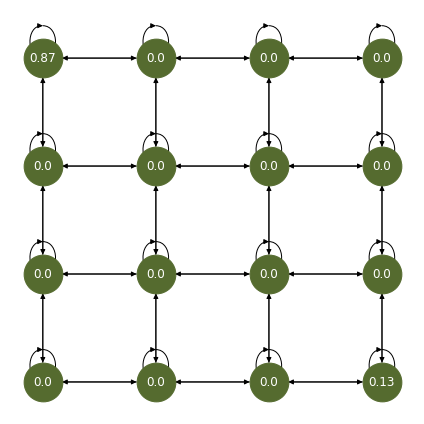

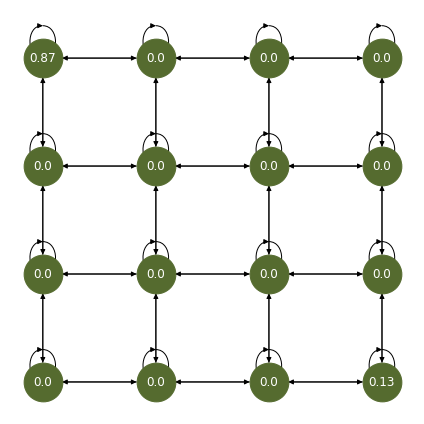

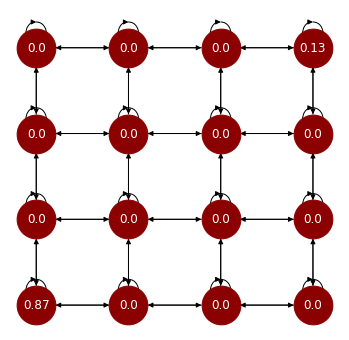

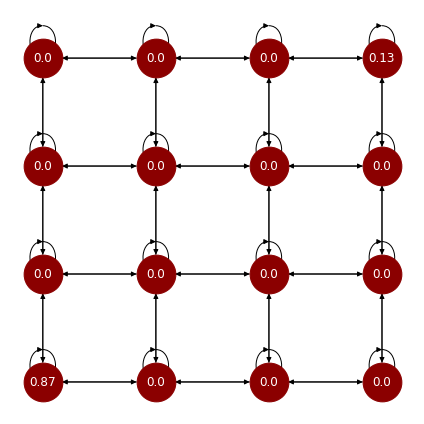

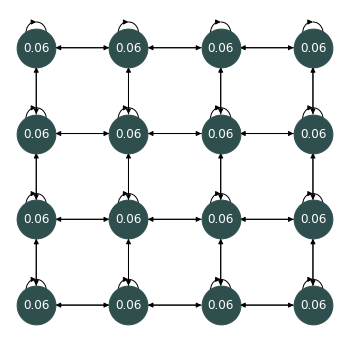

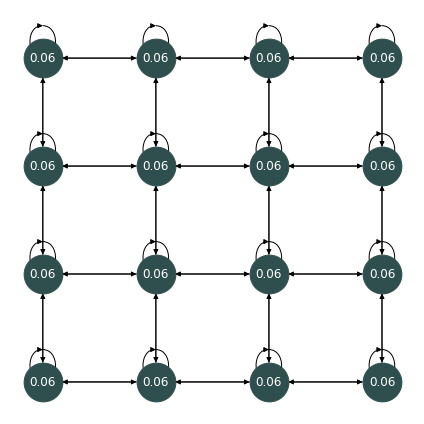

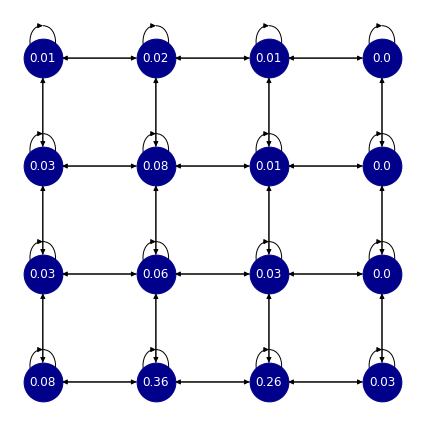

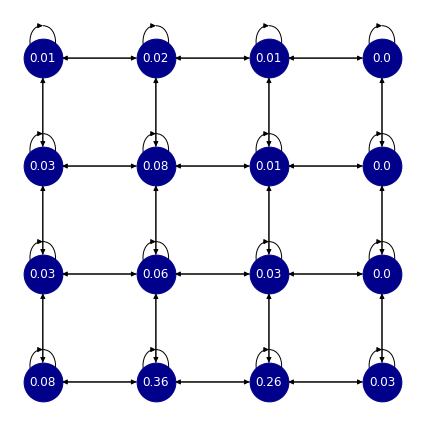

In [10]:
fig1, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw(
    mdp.G,
    mdp.graph_layout,
    labels=osd_node_labels,
    node_color="darkolivegreen",
    font_color="white",
    node_size=1500,
    ax=ax,
)
plt.tight_layout()
glue("osd", fig1)
plt.show()

fig2, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw(
    mdp.G,
    mdp.graph_layout,
    labels=wsd_node_labels,
    node_color="darkred",
    font_color="white",
    node_size=1500,
    ax=ax,
)
glue("wsd", fig2)
plt.tight_layout()
plt.show()

fig3, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw(
    mdp.G,
    mdp.graph_layout,
    labels=rsd_node_labels,
    node_color="darkslategray",
    font_color="white",
    node_size=1500,
    ax=ax,
)
glue("rsd", fig3)
plt.tight_layout()
plt.show()

fig4, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw(
    mdp.G,
    mdp.graph_layout,
    labels=sd_node_labels,
    node_color="darkblue",
    font_color="white",
    node_size=1500,
    ax=ax,
)
plt.tight_layout()
glue("sd", fig4)
plt.show()

```{glue:figure} osd
:figwidth: 500px
The stationary distribution of the optimal policy.
```

```{glue:figure} wsd
:figwidth: 500px
The stationary distribution of the worst policy.
```

```{glue:figure} rsd
:figwidth: 500px
The stationary distribution of the random policy.
```

```{glue:figure} sd
:figwidth: 500px
The stationary distribution of a randomly sampled policy.
```

**Expected average reward**  
The
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.optimal_average_reward">``optimal_average_reward``</a>, the
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.worst_average_reward">``worst_average_reward``</a>, and the
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.random_average_reward">``random_average_reward``</a>
properties return the expected time average reward, i.e.
$
  \underset{T\to \infty}{\text{lim inf}} \frac{1}{T} \mathbb{E}_\pi \sum_{t=0}^T R_t
$, associated to the optimal, worst, and uniformly random policies.
We can compute such measure for a custom policy using the
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.get_average_reward">``get_average_reward``</a>
function.
```{code-block} python
mdp.optimal_average_reward
mdp.worst_average_reward
mdp.random_average_reward
mdp.get_average_reward(pi)
```

In [11]:
glue("oar", mdp.optimal_average_reward)
glue("war", mdp.worst_average_reward)
glue("rar", mdp.random_average_reward)
glue("ar", mdp.get_average_reward(pi))

0.9959919693746492

0.004008056365342812

0.5000000148429536

0.48442049852849006

```{list-table}
:header-rows: 1

* - 
  - Optimal policy
  - Worst policy
  - Random policy
  - Randomly sampled policy
* - Average regret
  - {glue:text}`oar:.3f`
  - {glue:text}`war:.3f`
  - {glue:text}`rar:.3f`
  - {glue:text}`ar:.3f`
```

**Value functions**  
The
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.optimal_value_functions">``optimal_value_functions``</a>, the
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.worst_value_functions">``worst_value_functions``</a>, and the
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.random_value_functions">``random_value_functions``</a>
properties return a tuple containing the state-action function and the state value function associated to the optimal, worst, and uniformly random policies.
We can compute the value function for a custom policy using the
<a href="../pdoc_files/colosseum/mdp/base.html#BaseMDP.get_value_functions">``get_value_functions``</a>
function.

In [12]:
ov = mdp.optimal_value_functions[1].round(2)
ov_node_labels = mdp.get_node_labels(ov)

wv = mdp.worst_value_functions[1].round(2)
wv_node_labels = mdp.get_node_labels(wv)

rv = mdp.random_value_functions[1].round(2)
rv_node_labels = mdp.get_node_labels(rv)

v = mdp.get_value_functions(pi)[1].round(2)
v_node_labels = mdp.get_node_labels(v)

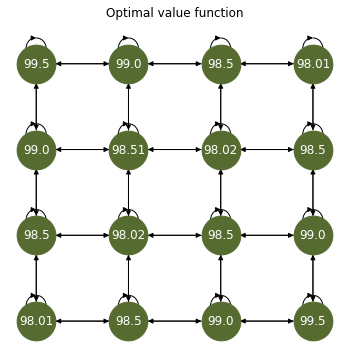

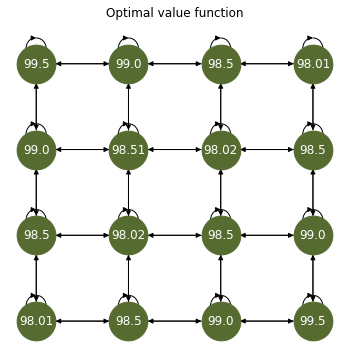

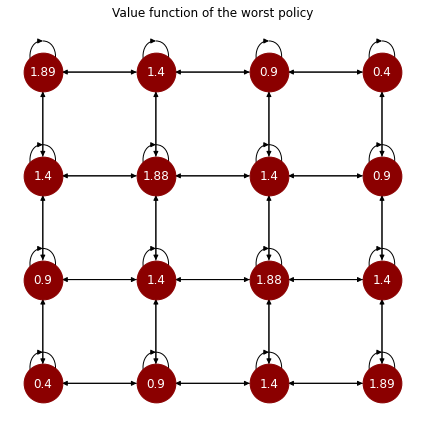

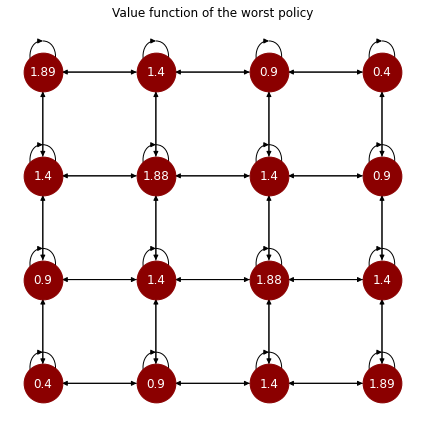

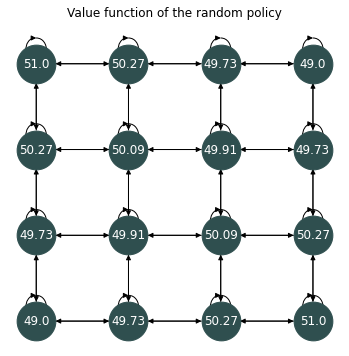

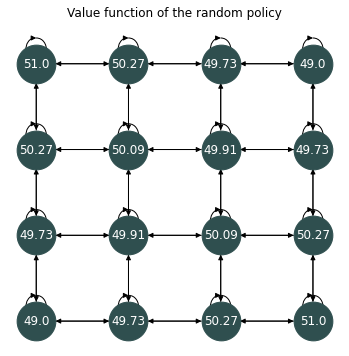

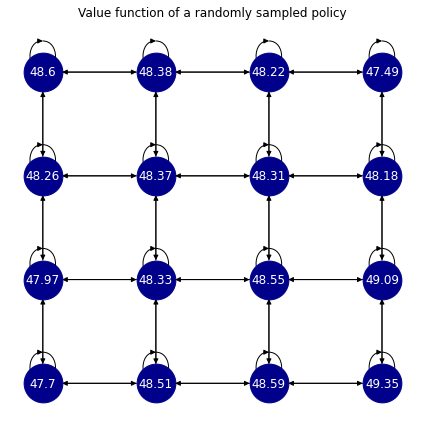

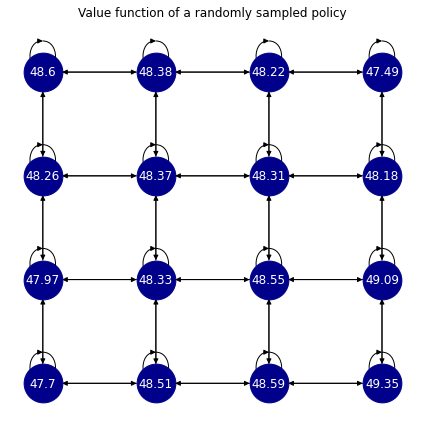

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw(
    mdp.G,
    mdp.graph_layout,
    labels=ov_node_labels,
    node_color="darkolivegreen",
    font_color="white",
    node_size=1500,
    ax=ax,
    vmin = 0,
    vmax = 1
)
ax.set_title("Optimal value function")
glue("ov", fig)
plt.show()
#%%
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw(
    mdp.G,
    mdp.graph_layout,
    labels=wv_node_labels,
    node_color="darkred",
    font_color="white",
    node_size=1500,
    ax=ax,
)
ax.set_title("Value function of the worst policy")
plt.tight_layout()
glue("wv", fig)
plt.show()
#%%
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw(
    mdp.G,
    mdp.graph_layout,
    labels=rv_node_labels,
    node_color="darkslategray",
    font_color="white",
    node_size=1500,
    ax=ax,
)
ax.set_title("Value function of the random policy")
glue("rv", fig)
plt.show()
#%%
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw(
    mdp.G,
    mdp.graph_layout,
    labels=v_node_labels,
    node_color="darkblue",
    font_color="white",
    node_size=1500,
    ax=ax,
)
ax.set_title("Value function of a randomly sampled policy")
plt.tight_layout()
glue("v", fig)
plt.show()

```{glue:figure} ov
:figwidth: 500px
The value function of the optimal policy.
```

```{glue:figure} rv
:figwidth: 500px
The value function of the random policy.
```

```{glue:figure} wv
:figwidth: 500px
The value function of the worst policy.
```

```{glue:figure} v
:figwidth: 500px
The value function of a randomly sampled policy.
```